# IMPORTING LIBRARIES AND DATA

IMPORTING LIBRARIES

In [644]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px

from scipy.stats import skew
from sklearn.preprocessing import power_transform



from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

IMPORTING DATA/DATASET

In [645]:
WER=pd.read_csv("winequality-red.csv")


OBSERVING NUMBER OF ROWS AND COLUMS

In [646]:
print("Rows, columns: " + str(WER.shape))

Rows, columns: (1599, 12)


LOADING FIRST 5 ROWS

In [647]:
WER.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


CHECKING FOR NULL(NA) VALUES

In [648]:
print(WER.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


There are no null values

CHECKING FOR MISSING VALUES

In [649]:
print(WER.eq('').sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


No missing values found

# Performing EDA

Histogram of ‘quality’ variable

In [718]:
fig = px.histogram(WER,x='quality')
fig.show()

CORRELATIONS BETWEEN DIFFERENT FEATURES

<AxesSubplot:>

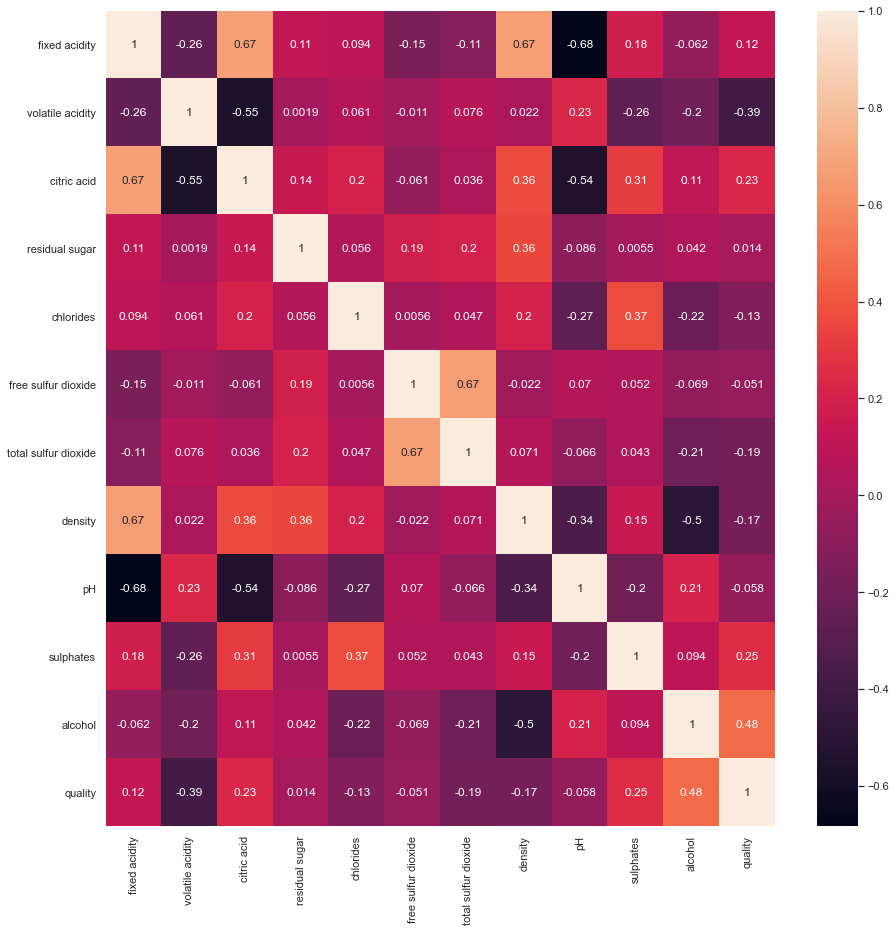

In [650]:
plt.figure(figsize=(15,15))
sns.heatmap(WER.corr(),color = "k", annot=True)


observations:
    
    Following features are correlated:-
        Total sulfur dioxide and  Free sulfur dioxide
        Fixed acidity and Density, Citric acid
        Alcohol and Quality

    Following features are inversely correlated:-
        Fixed acidity and  pH
        Citric acid and pH, Volatile acidity

----------------------------------------------------------------------------------------------------------------------------

PERFORMING BIVARIATE ANALYSIS

Relation between fixed acidity and quality

Text(0.5, 1.0, 'fixed acidity and quality')

<Figure size 1080x360 with 0 Axes>

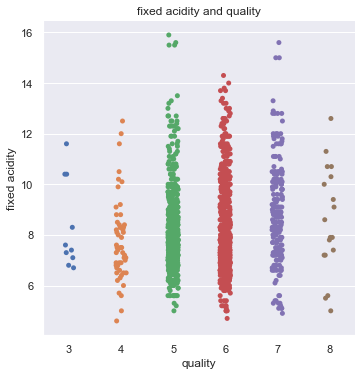

In [651]:
plt.figure(figsize=(15,5))
sns.catplot(x= "quality", y="fixed acidity" , data = WER) 
plt.title('fixed acidity and quality')

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

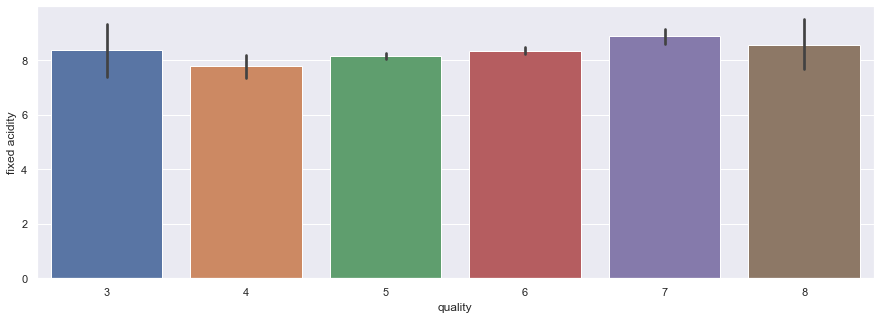

In [652]:
plt.figure(figsize=(15,5))
sns.barplot(x="quality", y="fixed acidity",   data=WER)

Text(0, 0.5, 'fixed acidity')

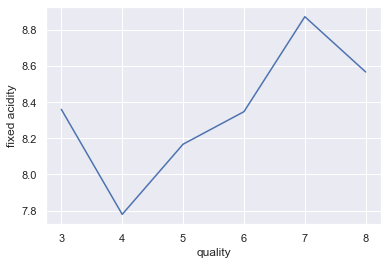

In [653]:
WER.groupby('quality')['fixed acidity'].mean().plot.line()
plt.ylabel("fixed acidity")

OBSERVATIONS:

There is not much effect of fixed acidity on the quality of the wine.

Relation between volatile acidity and quality

Text(0.5, 1.0, 'volatile acidity and quality')

<Figure size 1080x360 with 0 Axes>

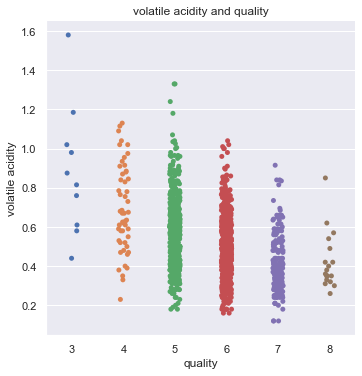

In [654]:
plt.figure(figsize=(15,5))
sns.catplot(x= "quality", y="volatile acidity" , data = WER) 
plt.title('volatile acidity and quality')



<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

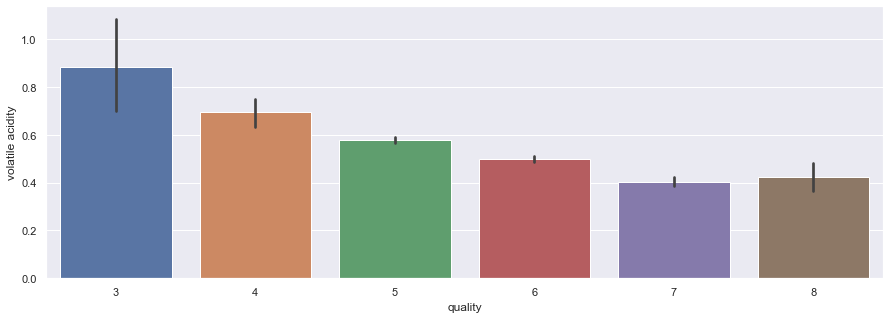

In [655]:
plt.figure(figsize=(15,5))
sns.barplot(x="quality", y="volatile acidity",   data=WER)

Text(0, 0.5, 'volatile acidity')

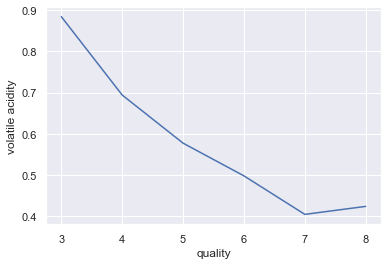

In [656]:
WER.groupby('quality')['volatile acidity'].mean().plot.line()
plt.ylabel("volatile acidity")

OBSERVATIONS:

From the above Visualizations we can see that the quality of wine increases with the decrease in the amount of volatile acids.

---------------------------------------------------------------------------------------------------

Relation between sulphates and quality

Text(0.5, 1.0, 'sulphates and quality')

<Figure size 1080x360 with 0 Axes>

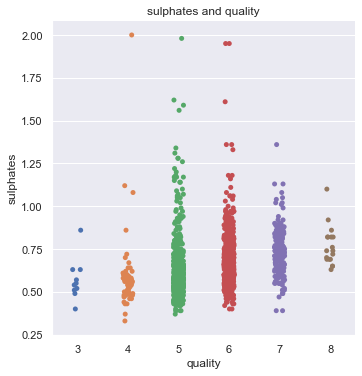

In [657]:
plt.figure(figsize=(15,5))
sns.catplot(x= "quality", y="sulphates" , data = WER) 
plt.title('sulphates and quality')

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

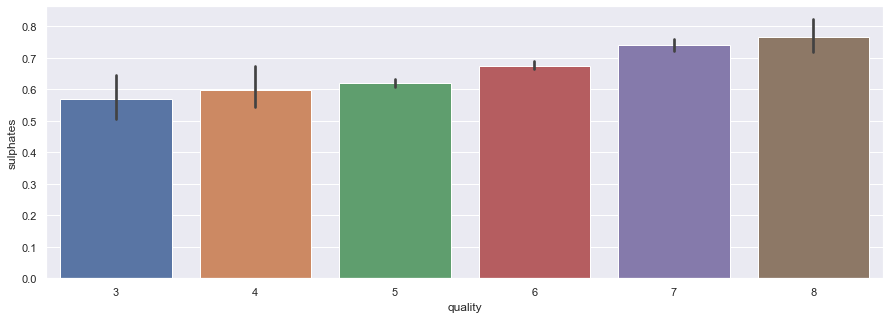

In [658]:
plt.figure(figsize=(15,5))
sns.barplot(x="quality", y="sulphates",   data=WER)

Text(0, 0.5, 'sulphates')

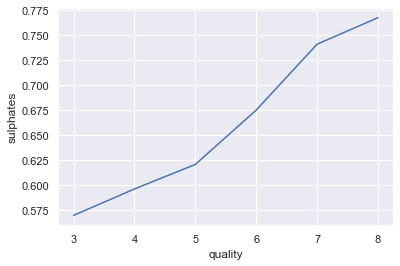

In [659]:
WER.groupby('quality')['sulphates'].mean().plot.line()
plt.ylabel("sulphates")

OBSERVATIONS:

From the above Visualizations we can see that the quality of wine increases with the increase in the amount of sulphates.

----------------------------------------------------------------------------------

Relation between quality and pH

Text(0.5, 1.0, 'pH and quality')

<Figure size 1080x360 with 0 Axes>

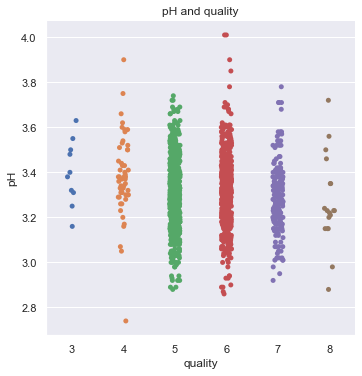

In [660]:
plt.figure(figsize=(15,5))
sns.catplot(x= "quality", y="pH" , data = WER) 
plt.title('pH and quality')

<AxesSubplot:xlabel='quality', ylabel='pH'>

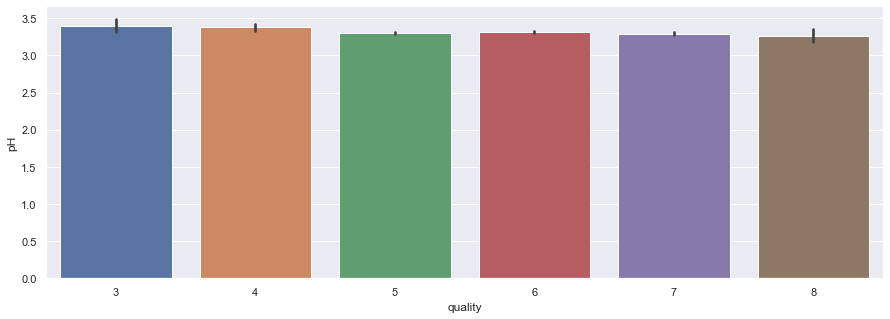

In [661]:
plt.figure(figsize=(15,5))
sns.barplot(x="quality", y="pH",   data=WER)

Text(0, 0.5, 'pH')

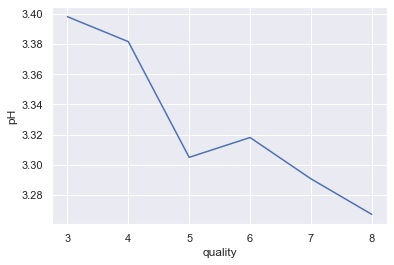

In [662]:
WER.groupby('quality')['pH'].mean().plot.line()
plt.ylabel("pH")

OBSERVATIONS:

From the visualizations of qulaity vs ph we can observe that there is a slight decrease in pH with the increase in quality of the wine.

----------------------------------------------------------------------------------

Relation between fixed quality and alcohol

Text(0.5, 1.0, 'alcohol and quality')

<Figure size 1080x360 with 0 Axes>

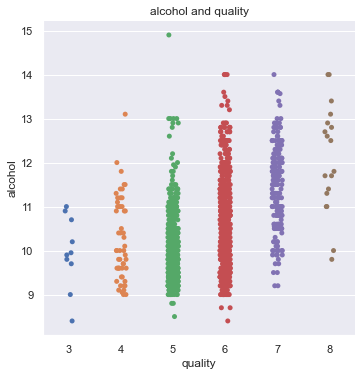

In [663]:
plt.figure(figsize=(15,5))
sns.catplot(x= "quality", y="alcohol" , data = WER) 
plt.title('alcohol and quality')



<AxesSubplot:xlabel='quality', ylabel='alcohol'>

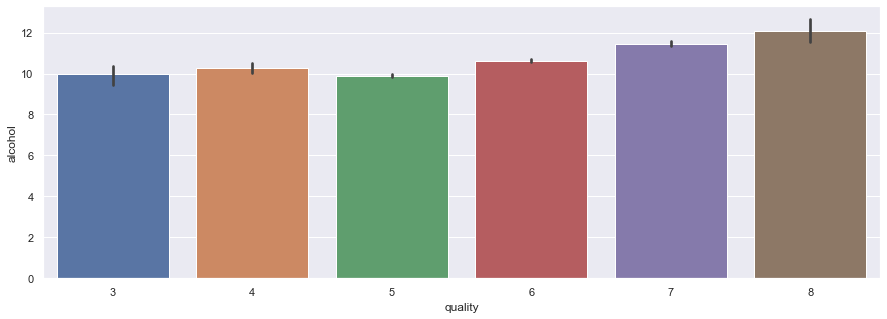

In [664]:
plt.figure(figsize=(15,5))
sns.barplot(x="quality", y="alcohol",   data=WER)

Text(0, 0.5, 'alcohol')

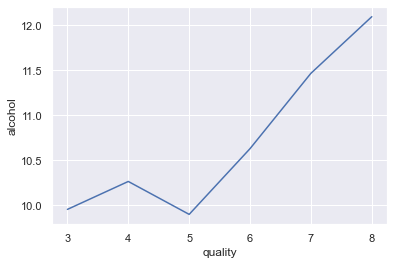

In [665]:
WER.groupby('quality')['alcohol'].mean().plot.line()
plt.ylabel("alcohol")

OBSERVATIONS:

The above visualization shows the increase in the quality of wine with the increase in alcohol. The quality of the wine is directly related to the amount of alcohol in the wine. More the alcohol in the wine better will be the quality.

Relation between quality and citric acid

Text(0.5, 1.0, 'citric acid and quality')

<Figure size 1080x360 with 0 Axes>

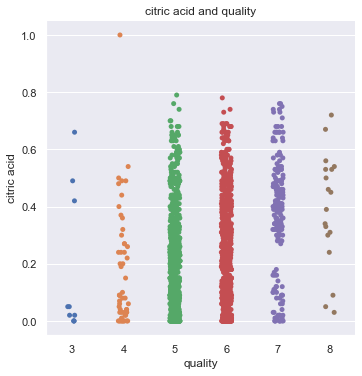

In [666]:
plt.figure(figsize=(15,5))
sns.catplot(x= "quality", y="citric acid" , data = WER) 
plt.title('citric acid and quality')


<AxesSubplot:xlabel='quality', ylabel='citric acid'>

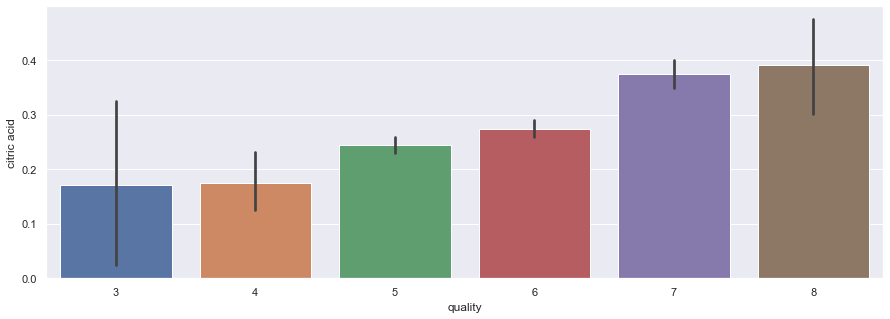

In [667]:
plt.figure(figsize=(15,5))
sns.barplot(x="quality", y="citric acid",   data=WER)

Text(0, 0.5, 'citric acid')

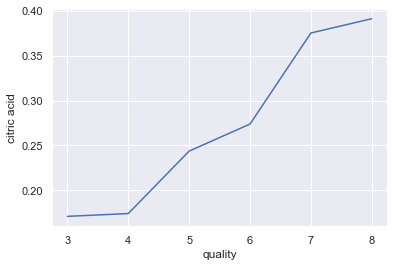

In [668]:

WER.groupby('quality')['citric acid'].mean().plot.line()
plt.ylabel("citric acid")

OBSERVATIONS:

The quality of the wine increses with increase in the amount of citric acid in the wine.

-----------------------------------------------------

Relation between quality and residual sugar

Text(0.5, 1.0, 'residual sugar and quality')

<Figure size 1080x360 with 0 Axes>

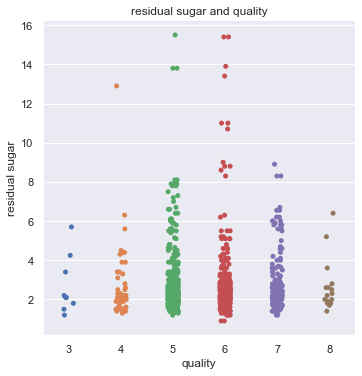

In [669]:
plt.figure(figsize=(15,5))
sns.catplot(x= "quality", y="residual sugar" , data = WER) 
plt.title('residual sugar and quality')

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

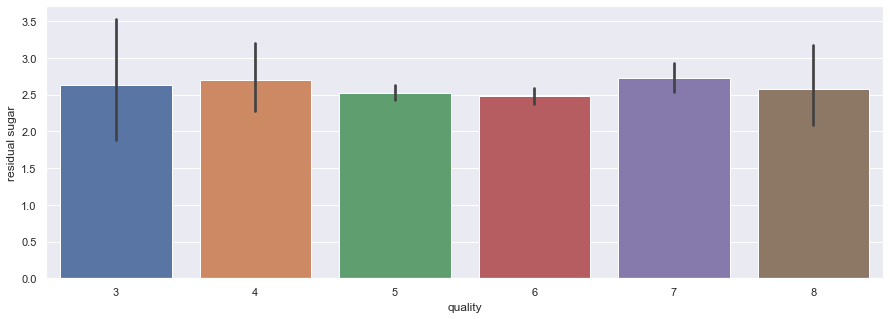

In [670]:
plt.figure(figsize=(15,5))
sns.barplot(x="quality", y="residual sugar",   data=WER)

Text(0, 0.5, 'residual sugar')

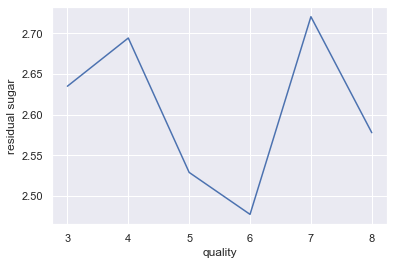

In [671]:
WER.groupby('quality')['residual sugar'].mean().plot.line()
plt.ylabel("residual sugar")

OBSERVATIONS:

There is not much effect of the residual sugar on the quality of the wine.

----------------------------------------------

Relation between quality and chlorides

Text(0.5, 1.0, 'chlorides and quality')

<Figure size 1080x360 with 0 Axes>

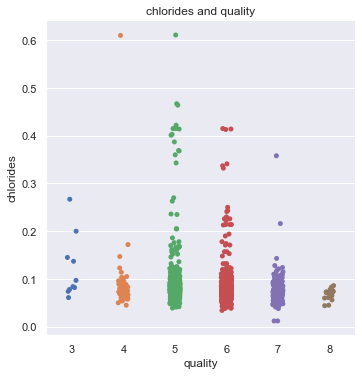

In [672]:
plt.figure(figsize=(15,5))
sns.catplot(x= "quality", y="chlorides" , data = WER) 
plt.title('chlorides and quality')

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

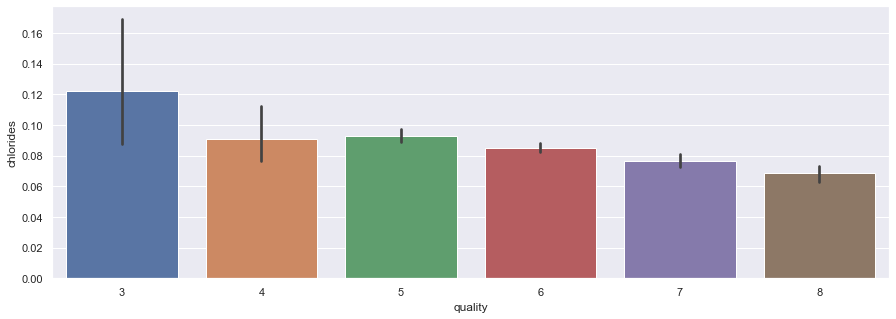

In [673]:
plt.figure(figsize=(15,5))
sns.barplot(x="quality", y="chlorides",   data=WER)

Text(0, 0.5, 'chlorides')

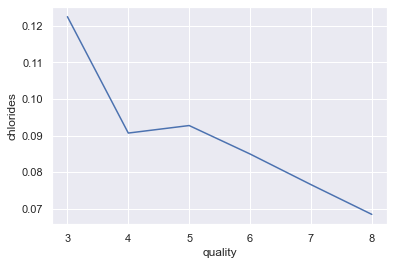

In [674]:
WER.groupby('quality')['chlorides'].mean().plot.line()
plt.ylabel("chlorides")

OBSERVATIONS:

From the above visualization we can see that there is not even a slight change in the quality of wine for a particular amount of chlorides mixed in them.

-----------------------------------

Relation between quality and density

Text(0.5, 1.0, 'density and quality')

<Figure size 1080x360 with 0 Axes>

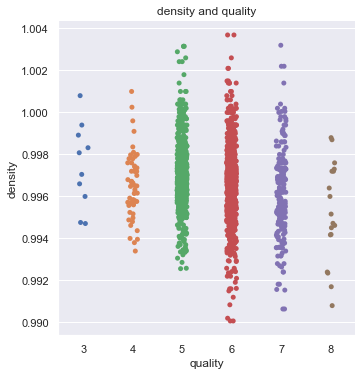

In [675]:
plt.figure(figsize=(15,5))
sns.catplot(x= "quality", y="density" , data = WER) 
plt.title('density and quality')

<AxesSubplot:xlabel='quality', ylabel='density'>

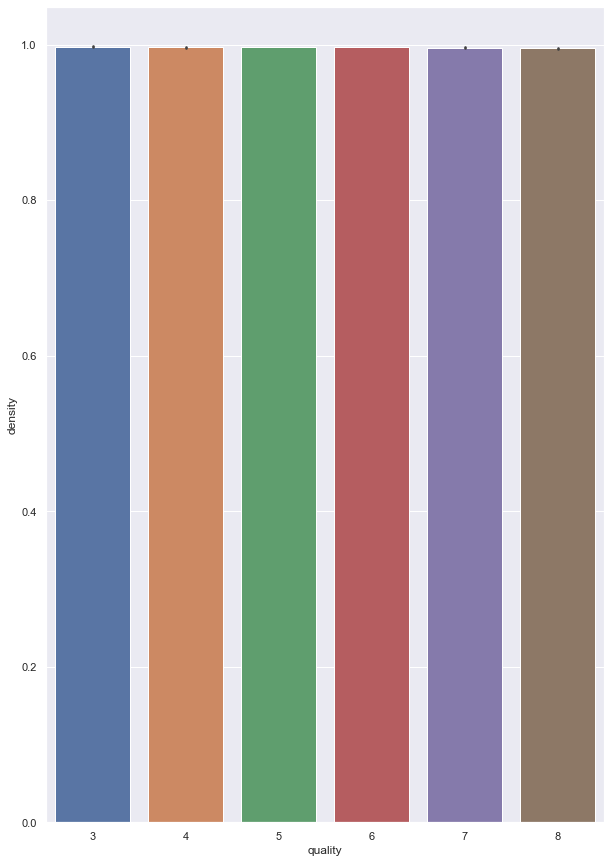

In [676]:
plt.figure(figsize=(10,15))
sns.barplot(x="quality", y="density",   data=WER)

Text(0, 0.5, 'density')

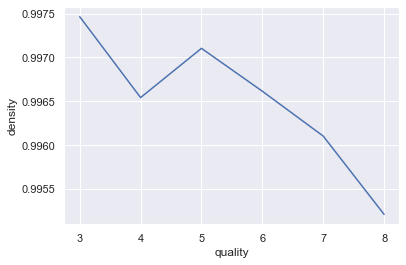

In [677]:
WER.groupby('quality')['density'].mean().plot.line()
plt.ylabel("density")

OBSERVATIONS:

Lower the density of wine better will be the quality of the wine. From the above visualization we can observe that the quality of wine increases with decrease in density.

Effect of acidity on the quality of wine

    Citric Acid
    Volatile Acidity
    Fixed Acidity

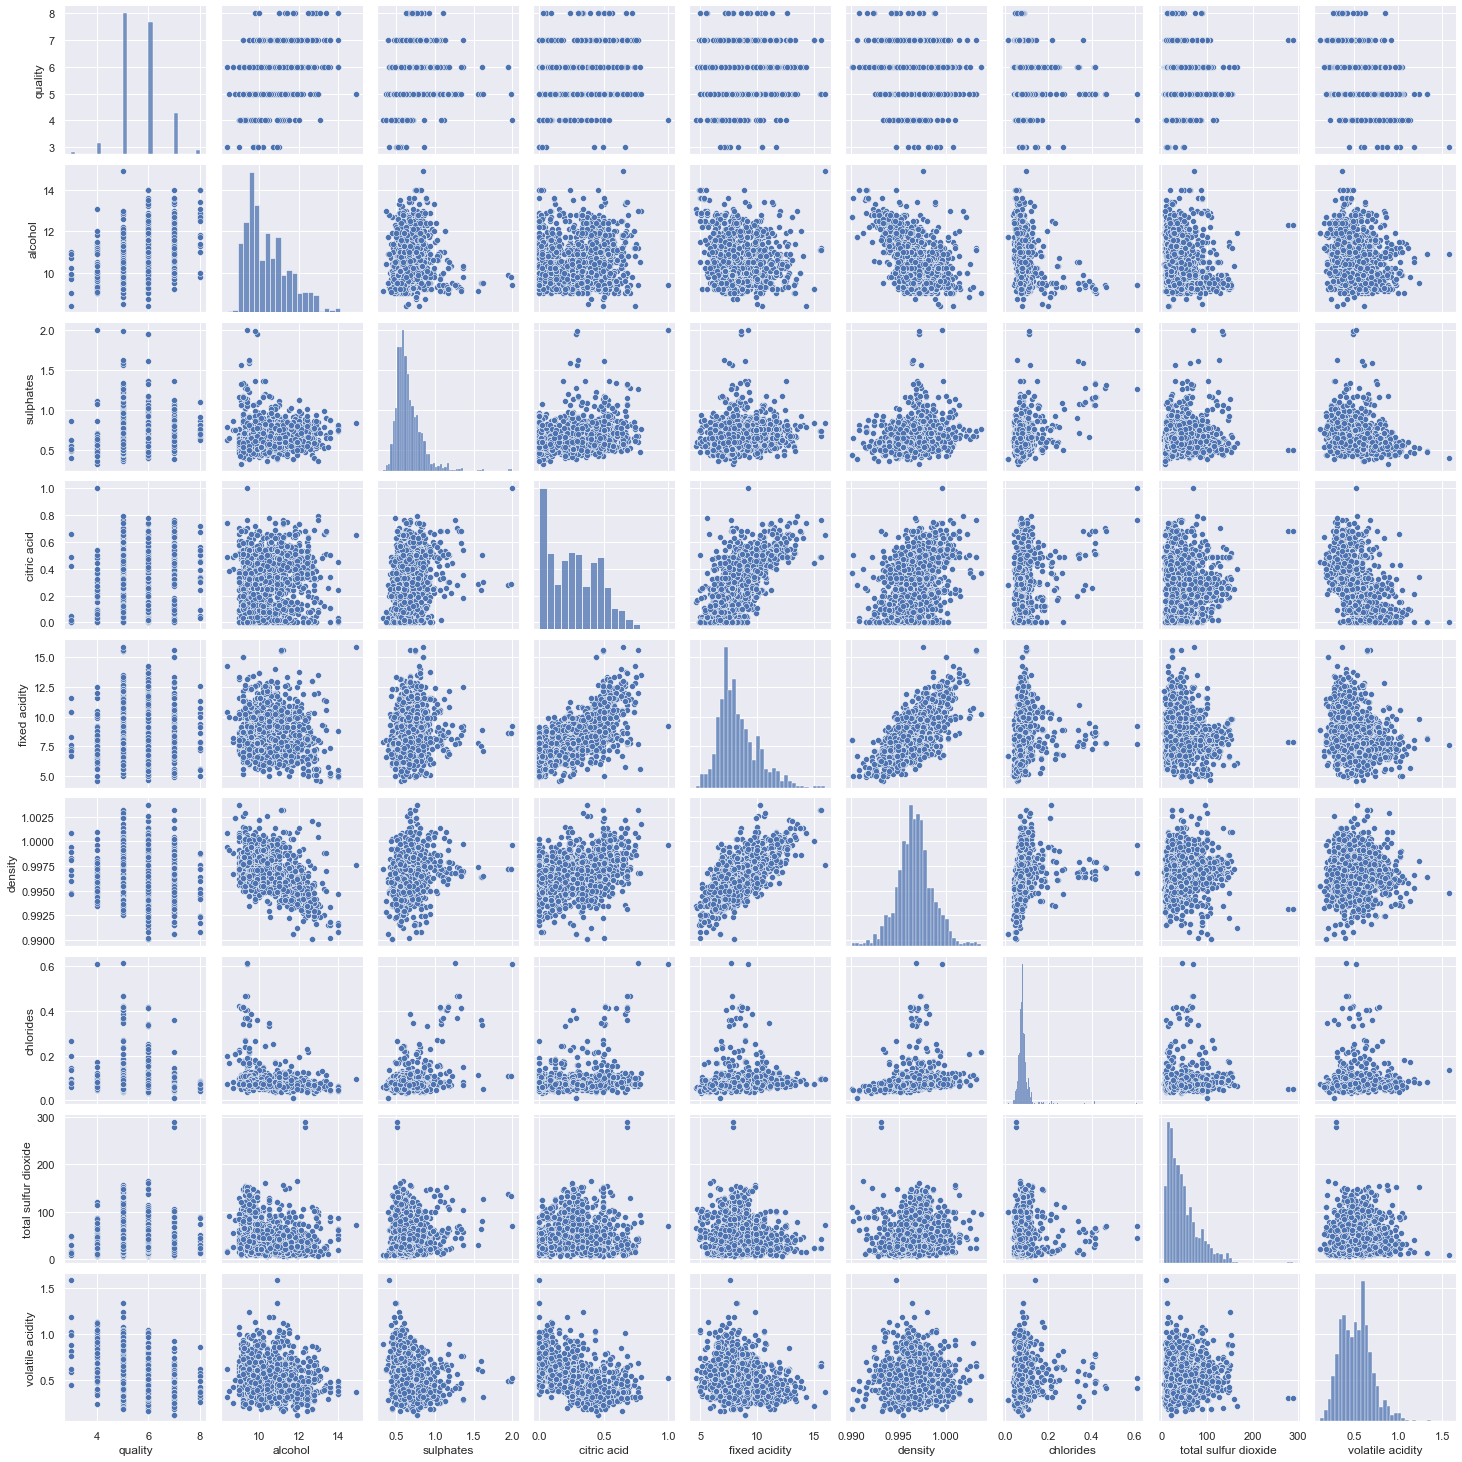

In [678]:
sns.set()
cols = ['quality', 'alcohol', 'sulphates', 'citric acid', 'fixed acidity', 'density','chlorides','total sulfur dioxide','volatile acidity']
sns.pairplot(WER[cols], size = 2.3)
plt.show()

<AxesSubplot:>

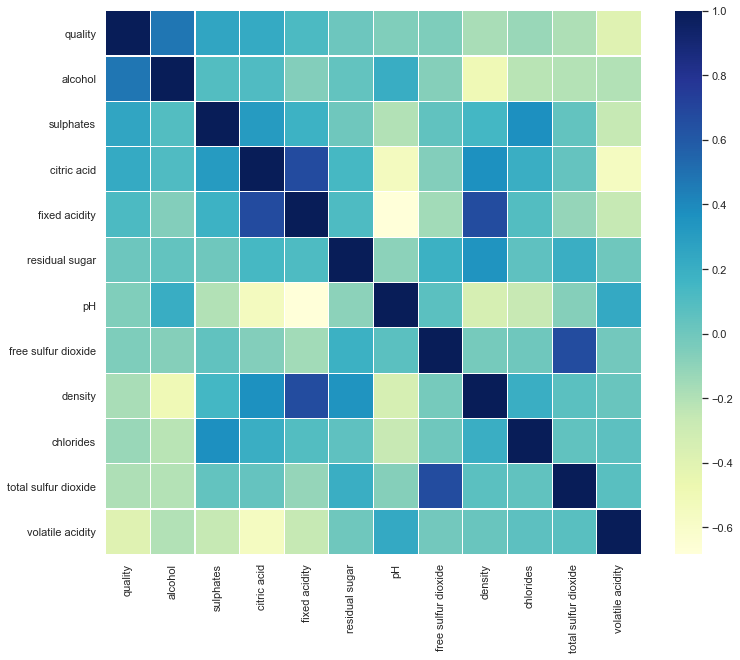

In [679]:
corrmat = WER.corr(method='spearman')
k = 12 
cols = corrmat.nlargest(k, 'quality')['quality'].index
cm = np.corrcoef(WER[cols].values.T)
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(cm, ax=ax, cmap="YlGnBu", linewidths=0.1, yticklabels=cols.values, xticklabels=cols.values)

OBSERVATIONS:

Quality has a positive relationship between alcohol

Quality has a negative weak relationship between volitile_acidicity

Quality has almost no relationship between residual sugar, free sulfur dioxide, and pH.

Alcohol has a positive relationship between quality and weakly pH

Alcohol has a negative relationship between density

--------------------------------------------------------------

REMOVING OUTLIERS

<AxesSubplot:>

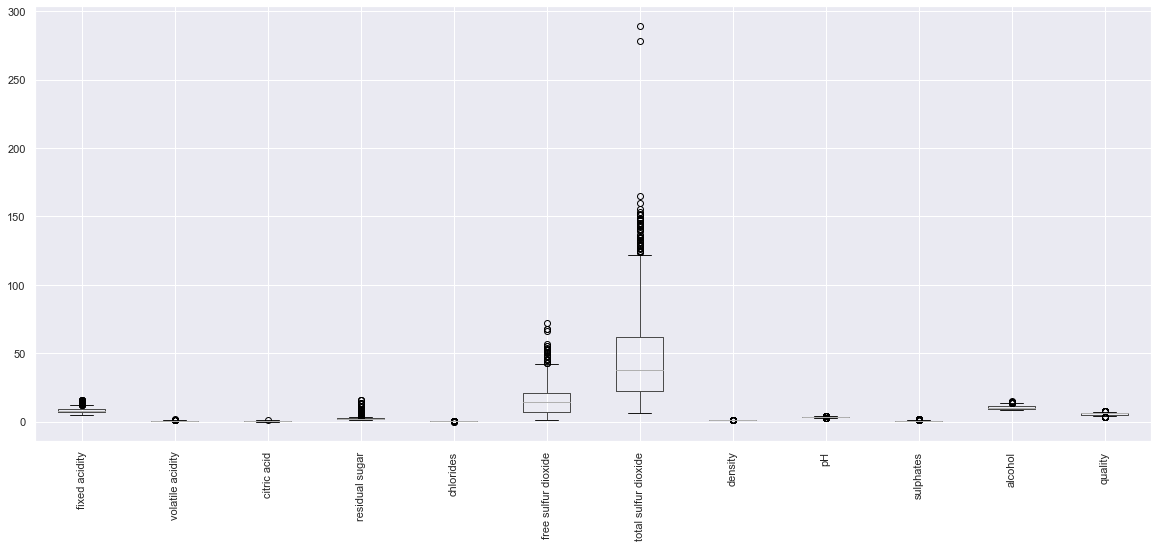

In [680]:
WER.boxplot( rot = 90, figsize=(20,8))

OBSERVATIONS:

There are outliers present in most of the columns i.e fixed acidity, residual sugar, free sulfur dioxide, total sulfur dioxide and alcohol.

In [681]:
from scipy.stats import zscore
z=np.abs(zscore(WER.iloc[:,:-1]))
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 1.28864292, 0.57920652,
        0.96024611],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.7199333 , 0.1289504 ,
        0.58477711],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.33117661, 0.04808883,
        0.58477711],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.70550789, 0.54204194,
        0.54162988],
       [1.39015528, 0.65462046, 0.77526673, ..., 1.6773996 , 0.30598963,
        0.20930812],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.51112954, 0.01092425,
        0.54162988]])

In [682]:
WER_new=WER[(z<3).all(axis=1)]

In [683]:
WER.shape

(1599, 12)

In [684]:
print("After removing outliers the new shape of dataset is:")
WER_new.shape

After removing outliers the new shape of dataset is:


(1458, 12)

In [685]:
WER=WER_new

REMOVING SKEWNESS

In [686]:
WER.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
quality                 0.248823
dtype: float64

OBSERVATIONS:

skewness is present in residual sugar,chlorides and total sulfur dioxide columns

In [687]:
fig = px.histogram(WER,x='residual sugar')
fig.show()

-0.0033475418252999867


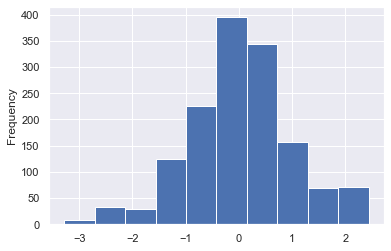

In [688]:
WER['residual sugar']=power_transform(WER[['residual sugar']], method='yeo-johnson')
WER['residual sugar'].plot.hist()
print(skew(WER['residual sugar']))

In [689]:
fig = px.histogram(WER,x='chlorides')
fig.show()

-0.11506064762290766


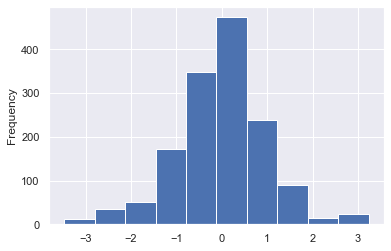

In [690]:
WER['chlorides']=power_transform(WER[['chlorides']], method='yeo-johnson')
WER['chlorides'].plot.hist()
print(skew(WER['chlorides']))

In [691]:
fig = px.histogram(WER,x='total sulfur dioxide')
fig.show()

-0.005744799781334627


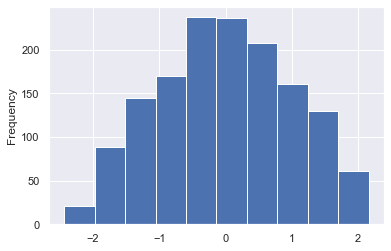

In [692]:
WER['total sulfur dioxide']=power_transform(WER[['total sulfur dioxide']], method='yeo-johnson')
WER['total sulfur dioxide'].plot.hist()
print(skew(WER['total sulfur dioxide']))

OBSERVATIONS:

The skewness has been removed from all the above features

<AxesSubplot:>

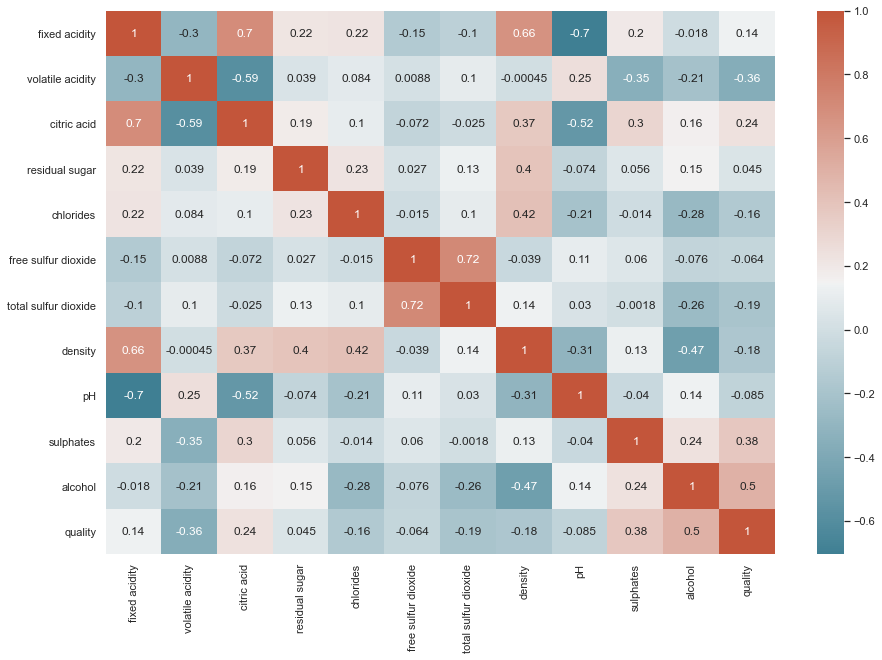

In [693]:
corr = WER.corr()
matplotlib.pyplot.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

OBSERVATONS:

After removing outliers and skewness from dataset the above visualization shows the updated CORRELATIONS BETWEEN DIFFERENT FEATURES

-------------------------------------

Convert to a Classification Problem

In [694]:

WER['goodquality'] = [1 if x >= 7 else 0 for x in WER['quality']]



In [695]:
x = WER.drop(['quality','goodquality'], axis = 1)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,-0.610050,-0.145674,11.0,-0.063312,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,0.648011,0.981105,25.0,0.954919,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,0.207208,0.714585,15.0,0.626959,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,-0.610050,-0.207728,17.0,0.786687,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,-0.610050,-0.145674,11.0,-0.063312,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,-0.374385,0.619516,32.0,0.319096,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,0.031636,-1.120823,39.0,0.540682,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,0.207208,-0.145674,29.0,0.177040,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,-0.374385,-0.207728,32.0,0.319096,0.99547,3.57,0.71,10.2


In [696]:
y =WER['goodquality']
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: goodquality, Length: 1458, dtype: int64

In [697]:
WER['goodquality'].value_counts()

0    1257
1     201
Name: goodquality, dtype: int64

OBSERVATIONS:

Proportion of Good vs Bad Wines

---------------------------------------------

# Preparing Data for Modelling

Standardizing Feature Variables

In [698]:
from sklearn.preprocessing import StandardScaler as ss
x_features = x
x = StandardScaler().fit_transform(x)

Splitting the data

In [699]:
x_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=0)

# Modelling

Two classification models have been used 
    
    Random Forest Classifier
    Ada Boost Classifier

USING Random Forest Classifier

In [700]:
from sklearn.ensemble import RandomForestClassifier

rfc= RandomForestClassifier(random_state=1)
rfc.fit(x_train, y_train)
y_pred2 = rfc.predict(x_test)

In [701]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82       315
           1       0.17      0.28      0.21        50

    accuracy                           0.71       365
   macro avg       0.52      0.53      0.52       365
weighted avg       0.78      0.71      0.74       365



OBSERVATIONS:

The above chart shows that  RandomForestClassifier has the accuracy score of 71%

USING Ada Boost Classifier

In [702]:
from sklearn.ensemble import AdaBoostClassifier

adc = AdaBoostClassifier(random_state=1)
adc.fit(x_train, y_train)
y_pred3 = adc.predict(x_test)

In [703]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       315
           1       0.45      0.20      0.28        50

    accuracy                           0.86       365
   macro avg       0.67      0.58      0.60       365
weighted avg       0.82      0.86      0.83       365



OBSERVATIONS:

The above chart shows that AdaBoostClassifier has the accuracy score of 86%

PERFORMING CROSS VALIDATION

FOR RandomForestClassifier 

In [704]:
from sklearn.model_selection import cross_val_score

In [705]:
scr=cross_val_score(rfc,x,y,cv=5)
scr.mean()

0.8731040813444428

OBSERVATIONS:

The corss validation score for RandomForestClassifier is 0.87%

FOR AdaBoostClassifier

In [706]:
scr=cross_val_score(adc,x,y,cv=5)
scr.mean()

0.8566257119992468

The corss validation score for AdaBoostClassifier is 0.86%

There is a minimum difference between accuracy score and cross validation score of AdaBoostClassifier i.e 0.0033742880007532 so its the best model 

# Hyperparameter Tuning 

In [707]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import auc, roc_curve
#Importing libraries for model parameter search and hyperparameter tuning
from sklearn.model_selection import GridSearchCV,StratifiedKFold
rnd_state = 42
skfold = StratifiedKFold(n_splits=5)


In [708]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(random_state=rnd_state, max_depth=2),
    random_state = rnd_state)

param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[10, 100, 200, 250],
              "learning_rate":  [0.05, 0.5, 1.5, 2.5]}
grid_ada_clf = GridSearchCV(ada_clf, param_grid, cv=skfold, scoring="accuracy", n_jobs= -1, verbose = 1)


In [709]:
grid_ada_clf.fit(x_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:   19.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                                random_state=42),
                                          random_state=42),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'base_estimator__criterion': ['gini', 'entropy'],
                         'base_estimator__splitter': ['best', 'random'],
                         'learning_rate': [0.05, 0.5, 1.5, 2.5],
                         'n_estimators': [10, 100, 200, 250]},
             scoring='accuracy', verbose=1)

In [710]:
grid_ada_clf.best_params_


{'algorithm': 'SAMME.R',
 'base_estimator__criterion': 'entropy',
 'base_estimator__splitter': 'best',
 'learning_rate': 0.05,
 'n_estimators': 250}

OBSERVATIONS:

The best parameters are 'algorithm': 'SAMME.R', 'base_estimator__criterion': 'entropy', 'base_estimator__splitter': 'best',
 'learning_rate': 0.05,'n_estimators': 250

In [711]:
ada_pred = grid_ada_clf.predict(x_train).astype(int)

In [712]:
grid_ada_scores = (grid_ada_clf.best_score_ + accuracy_score (ada_pred, y_train))/2

In [713]:
grid_ada_scores

0.9359738470000558

OBSERVATIONS:

The Best accuracy Score is 0.93%

Filtering Dataset for only good quality

In [714]:
WER_temp = WER[WER['goodquality']==1]
WER_temp.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.0
mean,8.826368,0.410423,0.373731,0.175601,-0.360897,13.099502,-0.459008,0.996056,3.288109,0.743035,11.518491,7.079602,1.0
std,1.808632,0.145665,0.192116,1.154637,1.099261,9.155875,0.899680,0.001977,0.142672,0.121829,0.940970,0.271352,0.0
min,5.100000,0.120000,0.000000,-3.278735,-3.468131,3.000000,-2.240016,0.991570,2.880000,0.470000,9.500000,7.000000,1.0
25%,7.400000,0.310000,0.310000,-0.610050,-1.042991,6.000000,-1.142912,0.994730,3.200000,0.650000,10.800000,7.000000,1.0
50%,8.800000,0.370000,0.400000,0.207208,-0.335109,10.000000,-0.511137,0.995720,3.280000,0.740000,11.600000,7.000000,1.0
75%,10.100000,0.500000,0.490000,0.771392,0.367111,17.000000,0.249660,0.997320,3.370000,0.820000,12.200000,7.000000,1.0
max,13.300000,0.915000,0.760000,2.437258,3.174381,45.000000,1.664147,1.002200,3.710000,1.130000,13.600000,8.000000,1.0


Filtering df for only not good quality

In [715]:
WER_temp = WER[WER['goodquality']==0]
WER_temp.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.0
mean,8.230390,0.542220,0.247940,-0.028079,0.057709,15.408115,0.073397,0.996824,3.320636,0.626325,10.241793,5.417661,0.0
std,1.606005,0.165932,0.185416,0.970986,0.971718,9.307454,0.996409,0.001650,0.140330,0.123642,0.919198,0.593038,0.0
min,5.000000,0.160000,0.000000,-3.278735,-3.468131,1.000000,-2.431257,0.991500,2.880000,0.330000,8.400000,3.000000,0.0
25%,7.100000,0.420000,0.080000,-0.610050,-0.466992,8.000000,-0.630902,0.995780,3.220000,0.540000,9.500000,5.000000,0.0
50%,7.800000,0.540000,0.240000,0.031636,0.092079,14.000000,0.100922,0.996800,3.320000,0.600000,10.000000,5.000000,0.0
75%,9.100000,0.645000,0.400000,0.513760,0.570749,21.000000,0.811826,0.997830,3.410000,0.680000,10.900000,6.000000,0.0
max,13.500000,1.040000,0.790000,2.424235,3.232807,47.000000,2.157153,1.002100,3.750000,1.160000,13.500000,6.000000,0.0


OBSERVATIONS:

By looking into the above charts , we can see that good quality wines have higher levels of alcohol on average, have a lower volatile acidity on average, higher levels of sulphates on average, and higher levels of residual sugar on average.

# Saving model

In [716]:
import joblib
joblib.dump(grid_ada_clf.best_estimator_,"WINE_RED_QLTY.obj")

['WINE_RED_QLTY.obj']